<a href="https://colab.research.google.com/github/dogakusun/Mall_Customer_Segmentation/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
df = pd.read_csv("/content/Mall_Customers.csv")


In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
df.shape

(200, 5)

In [9]:
df.dtypes

,0
CustomerID,int64
Genre,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [10]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


<Axes: >

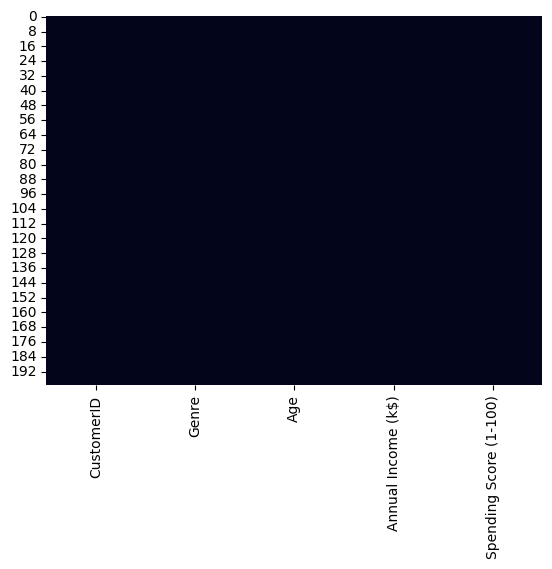

In [12]:
sns.heatmap(df.isnull(), cbar=False)

In [13]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
# Cinsiyet sayıları
gender_counts = df["Genre"].value_counts()

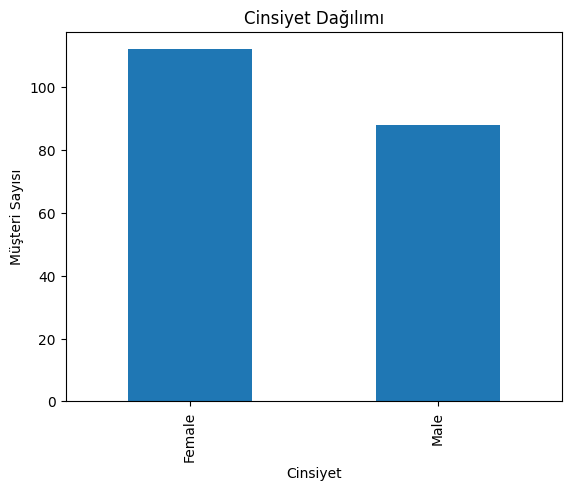

In [16]:
# Bar chart
gender_counts.plot(kind="bar")
plt.title("Cinsiyet Dağılımı")
plt.xlabel("Cinsiyet")
plt.ylabel("Müşteri Sayısı")
plt.show()

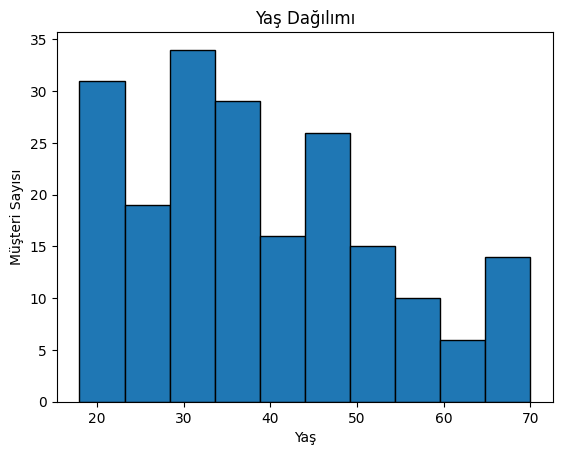

In [17]:
plt.hist(df["Age"], bins=10, edgecolor="black")
plt.title("Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Müşteri Sayısı")
plt.show()


Ortalama Yaş: 38.85


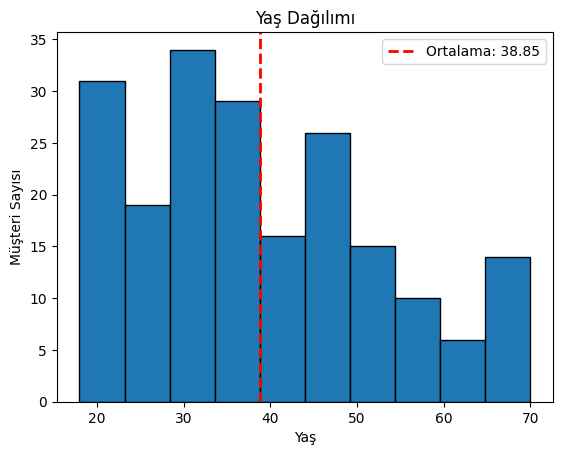

In [21]:
import matplotlib.pyplot as plt

# Ortalama yaşı hesapla
ortalama_yas = df["Age"].mean()
print("Ortalama Yaş:", ortalama_yas)

# Histogram çiz
plt.hist(df["Age"], bins=10, edgecolor="black")
plt.title("Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Müşteri Sayısı")

# Ortalama çizgisi ekle
plt.axvline(ortalama_yas, color="red", linestyle="dashed", linewidth=2, label=f"Ortalama: {ortalama_yas:.2f}")

# Açıklama kutusu
plt.legend()

plt.show()


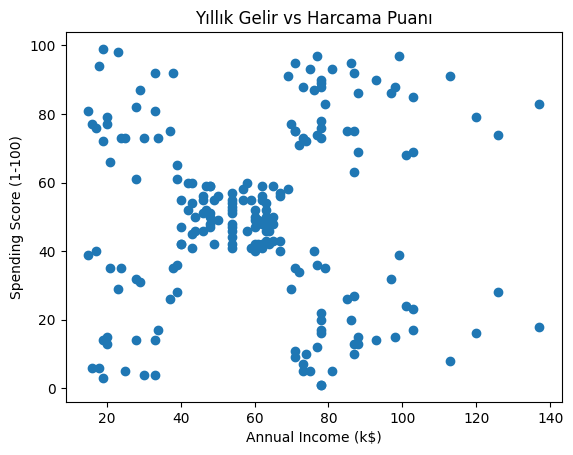

In [18]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.title("Yıllık Gelir vs Harcama Puanı")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


In [22]:
import pandas as pd

# Ortalama ve standart sapma
print("Yıllık Gelir Ortalaması:", df["Annual Income (k$)"].mean())
print("Yıllık Gelir Std:", df["Annual Income (k$)"].std())
print("Harcama Puanı Ortalaması:", df["Spending Score (1-100)"].mean())
print("Harcama Puanı Std:", df["Spending Score (1-100)"].std())

# Min - Max
print("Yıllık Gelir Min-Max:", df["Annual Income (k$)"].min(), "-", df["Annual Income (k$)"].max())
print("Harcama Puanı Min-Max:", df["Spending Score (1-100)"].min(), "-", df["Spending Score (1-100)"].max())

# Korelasyon
corr = df["Annual Income (k$)"].corr(df["Spending Score (1-100)"])
print("Gelir - Harcama Korelasyonu:", corr)


Yıllık Gelir Ortalaması: 60.56
Yıllık Gelir Std: 26.264721165271254
Harcama Puanı Ortalaması: 50.2
Harcama Puanı Std: 25.823521668370162
Yıllık Gelir Min-Max: 15 - 137
Harcama Puanı Min-Max: 1 - 99
Gelir - Harcama Korelasyonu: 0.009902848094037608


In [19]:
from sklearn.cluster import KMeans


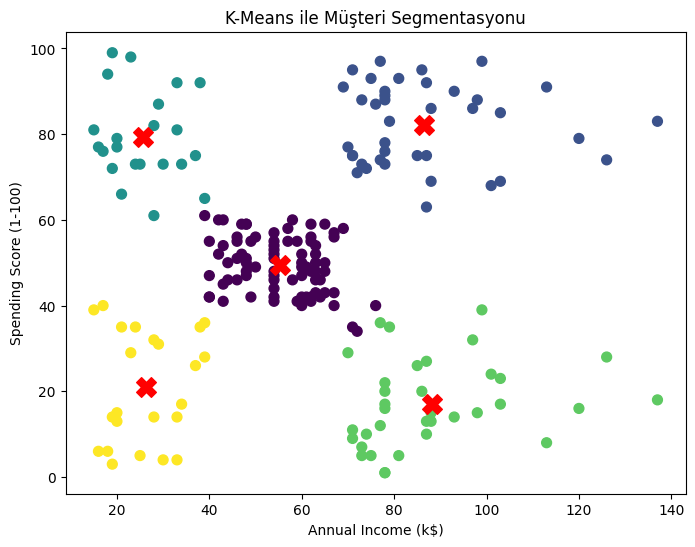

In [20]:
# Sadece gelir ve harcama puanı kolonlarını seçelim
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# K-Means (örnek: 5 küme)
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

# Küme merkezlerini al
centers = kmeans.cluster_centers_

# Scatter plot (renklendirilmiş kümeler)
plt.figure(figsize=(8,6))
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"],
            c=df["Cluster"], cmap="viridis", s=50)
plt.scatter(centers[:,0], centers[:,1], c="red", s=200, marker="X")  # küme merkezleri
plt.title("K-Means ile Müşteri Segmentasyonu")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()